# New York City vs Miami in terms of venues to visit

## Introduction
A. Introduction
Manhattan is known regionally as the City and urban core of the New York Metropolitan Area. It is the most densely populated of the five boroughs of New York City. Manhattan serves as the city's economic and administrative center, cultural identifier, and historical birthplace.

Miami is a coastal metropolis located in southeastern Florida in the United States. It is the third most populous metropolis on the East Coast of the United States. 

According to the Empire Center Publication [1], New York's estimated population decreased by 0.65% during 12 months ending July 1, 2020, while Florida's population increased by 1.12% during the same time.


According to the Businessinsider article[2], many individuals are fleeing New York City and are moving to Florida as the pandemic makes remote work look more permanent. When people move to new places, they might not want to change their lifestyles. The ones who get used to hanging out around some specific places within walking distance might want to be close to similar kinds of places in their new location if they decide to move.

With that in mind, I decided to analyze the venue similarities for each neighborhood between Manhattan and Miami for people who are thinking of moving to Miami from Manhattan.

When the similarities are considered, we can create a map and information chart where the neighborhoods are placed in Manhattan and Miami and each neighborhood is clustered according to the venue density.






Referance article: https://www.businessinsider.com/pandemic-prompts-wall-street-to-look-south-for-floridas-life-and-work-benefits-2020-12

With that in mind, I decided to analyze the venues similarities for each neighborhood between Manhattan and Miami for people who are thinking of moving to Miami from Manhattan.

## Data
1) Geographical Coordinates and Postal Codes of each neighborhood in Miami and Manhattan- Wikipedia

2) Venues name, venues location and venues category of each neighborhood in Miami and Manhattan- Foursquare

In [ ]:
#Importing necessary libraries

import pandas as pd
from bs4 import BeautifulSoup
import requests

# Importing Libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# import k-means from clustering stage


print('Libraries imported')

In [3]:
# WebScrapping

url=('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami')
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,'html5lib')
miami_table = soup.find_all('table', class_="wikitable sortable")

In [4]:
# Convert to Dataframe

df = pd.read_html(str(miami_table))[0]
df.head(10)

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25.750-80.283
6,Design District,NaN,3573,3623,NaN,25.813-80.193
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193
8,Edgewater,NaN,15005,6675,NaN,25.802-80.190
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25.762-80.316


In [226]:
# Keep the data clean and concise for future developments.

miami_data=pd.concat([df.Neighborhood,df.Coordinates.str.split('-',expand=True)],axis=1)
miami_data=miami_data.rename(columns={0:'Latitude',1:'Longitude'})
miami_data=miami_data.dropna()
miami_data=miami_data.reset_index(drop=True)
miami_data.Longitude='-' + miami_data.Longitude 
miami_data['Latitude'] = miami_data['Latitude'].astype(float)
miami_data['Longitude'] = miami_data['Longitude'].astype(float)

miami_data

,Neighborhood,Latitude,Longitude
0,Allapattah,25.815,-80.224
1,Arts & Entertainment District,25.799,-80.190
2,Brickell,25.758,-80.193
3,Buena Vista,25.813,-80.192
4,Coconut Grove,25.712,-80.257
5,Coral Way,25.750,-80.283
6,Design District,25.813,-80.193
7,Downtown,25.774,-80.193
8,Edgewater,25.802,-80.190
9,Flagami,25.762,-80.316


In [191]:
miami_data.at[15,'Neighborhood']='Midtown Miami'

In [193]:
# Extract the geograpical cordinates of Toronto

address = 'Miami'

geolocator = Nominatim(user_agent="et_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 25.7741728, -80.19362.


In [194]:
# create map of Toronto using latitude and longitude values

map_miami = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(miami_data['Latitude'], miami_data['Longitude'], miami_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

In [66]:
# New York Data

with open(r'C:\Users\tunah\OneDrive\Masaüstü\IBM Data Science\10)Applied DataScience Capstone\Week3-clustering\Project- segmenting and clustering neighborhoods in the city of Toronto\nydata.txt') as json_data:
    newyork_data = json.load(json_data)

In [67]:
neighborhoods_data = newyork_data['features']

In [75]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [82]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)

manhattan_data=manhattan_data.drop(['Borough'],axis=1)
manhattan_data.head(5)

,Neighborhood,Latitude,Longitude
0,Marble Hill,40.876551,-73.910660
1,Chinatown,40.715618,-73.994279
2,Washington Heights,40.851903,-73.936900
3,Inwood,40.867684,-73.921210
4,Hamilton Heights,40.823604,-73.949688


In [83]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [84]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [227]:
manhattan_miami_data=pd.concat([manhattan_data,miami_data])

In [228]:
manhattan_miami_data=manhattan_miami_data.reset_index(drop=True)
manhattan_miami_data

,Neighborhood,Latitude,Longitude
0,Marble Hill,40.876551,-73.910660
1,Chinatown,40.715618,-73.994279
2,Washington Heights,40.851903,-73.936900
3,Inwood,40.867684,-73.921210
4,Hamilton Heights,40.823604,-73.949688
5,Manhattanville,40.816934,-73.957385
6,Central Harlem,40.815976,-73.943211
7,East Harlem,40.792249,-73.944182
8,Upper East Side,40.775639,-73.960508
9,Yorkville,40.775930,-73.947118


In [229]:
CLIENT_ID = 'TSKO3HK045HRBVCMSYJRRTNTAMFJMFILJT5EEIASZTZIFMSU' # your Foursquare ID
CLIENT_SECRET = 'VHN2YRRYMLNQH5LE02GONCFMFHKDNNJVW2YKMN15KF40TBG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN = 'NU5OQUYBX01BFICYB5PZUMD4E1X3RUNXLLFDUYJVXXNLA12Z' # your FourSquare Access Token
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TSKO3HK045HRBVCMSYJRRTNTAMFJMFILJT5EEIASZTZIFMSU
CLIENT_SECRET:VHN2YRRYMLNQH5LE02GONCFMFHKDNNJVW2YKMN15KF40TBG


In [230]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

65 venues were returned by Foursquare.


In [231]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&oauth_token={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            ACCESS_TOKEN,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [232]:
# type your answer here
manhattan_miami_venues = getNearbyVenues(names=manhattan_miami_data['Neighborhood'],
                                   latitudes=manhattan_miami_data['Latitude'],
                                   longitudes=manhattan_miami_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [233]:
print(manhattan_miami_venues.shape)
manhattan_miami_venues.head()

(5089, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [234]:
# Check how many venues were returned for each neighborhood

total_venues=manhattan_miami_venues.groupby('Neighborhood').count()
total_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,10,10,10,10,10,10
Arts & Entertainment District,85,85,85,85,85,85
Battery Park City,100,100,100,100,100,100
Brickell,81,81,81,81,81,81
Buena Vista,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,100,100,100,100,100,100
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100


In [235]:
total_venues1=total_venues.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

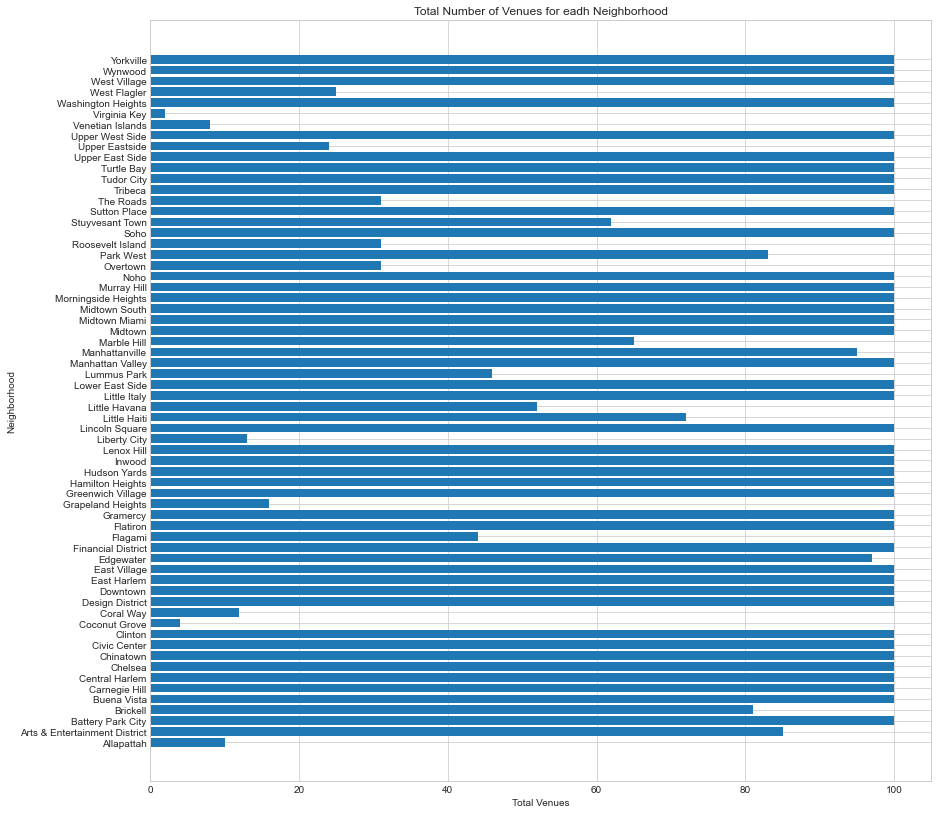

In [205]:
import matplotlib.pyplot as plt
   
plt.barh(total_venues1['Neighborhood'],total_venues1['Neighborhood Latitude'])

plt.xlabel('Total Venues')
plt.ylabel('Neighborhood')
plt.title('Total Number of Venues for eadh Neighborhood')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(16,16)
for a,b in zip(total_venues1['Neighborhood'],total_venues1['Neighborhood Latitude']):

        #label = "{:.0f}".format(b)
    label = format(int(b), ',')

#     plt.annotate(label, # this is the text
#                 (b,a), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,0,), # distance from text to points (x,y)
#                 ha='right')

plt.show

In [236]:
# one hot encoding
manhattan_miami_onehot = pd.get_dummies(manhattan_miami_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_miami_onehot['Neighborhood'] = manhattan_miami_venues['Neighborhood'] 

# move neighborhood column to the first column
neighborhood_column=manhattan_miami_onehot.pop('Neighborhood')
manhattan_miami_onehot.insert(0, 'Neighborhood', neighborhood_column)

manhattan_miami_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Nutritionist,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume 

In [237]:
# Examine the new dataframe size.
manhattan_miami_onehot.shape

(5089, 391)

In [238]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

manhattan_miami_grouped = manhattan_miami_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_miami_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Nutritionist,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume 

In [239]:
# Write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [241]:
# Create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_miami_grouped['Neighborhood']

for ind in np.arange(manhattan_miami_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_miami_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Food,Print Shop,Jewelry Store,Home Service,American Restaurant,Sporting Goods Shop,Department Store,Event Space,Falafel Restaurant,Farmers Market
1,Arts & Entertainment District,Gym,Salon / Barbershop,Gym / Fitness Center,Restaurant,Pizza Place,Spa,Yoga Studio,Furniture / Home Store,Business Service,Sandwich Place
2,Battery Park City,Park,Clothing Store,Coffee Shop,Memorial Site,Salad Place,Dessert Shop,Hotel,Juice Bar,Gourmet Shop,Food Court
3,Brickell,Hotel,Lawyer,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Café,Gym,Sandwich Place,Salon / Barbershop,Salad Place
4,Buena Vista,Boutique,Art Gallery,Jewelry Store,Pizza Place,Coffee Shop,Clothing Store,Café,Women's Store,Furniture / Home Store,Italian Restaurant


In [242]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Food,Print Shop,Jewelry Store,Home Service,American Restaurant,Sporting Goods Shop,Department Store,Event Space,Falafel Restaurant,Farmers Market
1,Arts & Entertainment District,Gym,Salon / Barbershop,Gym / Fitness Center,Restaurant,Pizza Place,Spa,Yoga Studio,Furniture / Home Store,Business Service,Sandwich Place
2,Battery Park City,Park,Clothing Store,Coffee Shop,Memorial Site,Salad Place,Dessert Shop,Hotel,Juice Bar,Gourmet Shop,Food Court
3,Brickell,Hotel,Lawyer,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Café,Gym,Sandwich Place,Salon / Barbershop,Salad Place
4,Buena Vista,Boutique,Art Gallery,Jewelry Store,Pizza Place,Coffee Shop,Clothing Store,Café,Women's Store,Furniture / Home Store,Italian Restaurant
5,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Bakery,Bar,Bookstore,French Restaurant,Grocery Store,Gym
6,Central Harlem,Deli / Bodega,Gym / Fitness Center,Liquor Store,Seafood Restaurant,African Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Caribbean Restaurant,Bar,Juice Bar
7,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,Nightclub,Hotel,Theater,Seafood Restaurant,Wine Shop,American Restaurant
8,Chinatown,Bakery,Chinese Restaurant,Dessert Shop,American Restaurant,Cocktail Bar,Salon / Barbershop,Ice Cream Shop,Hotpot Restaurant,Optical Shop,Spa
9,Civic Center,Coffee Shop,Bakery,Cocktail Bar,Gym / Fitness Center,Hotel,Yoga Studio,Spa,American Restaurant,French Restaurant,Gym


In [243]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


In [244]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 10

manhattan_miami_grouped_clustering = manhattan_miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 1, 0, 1, 0, 0, 7, 0, 0, 0])

In [245]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_miami_merged=pd.merge(manhattan_miami_data, neighborhoods_venues_sorted, how='left',left_on='Neighborhood',right_on='Neighborhood')

manhattan_miami_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,40.876551,-73.910660,7,Sandwich Place,Coffee Shop,Food,Shopping Mall,Optical Shop,Bakery,Video Game Store,Pizza Place,Shoe Store,Discount Store
1,Chinatown,40.715618,-73.994279,0,Bakery,Chinese Restaurant,Dessert Shop,American Restaurant,Cocktail Bar,Salon / Barbershop,Ice Cream Shop,Hotpot Restaurant,Optical Shop,Spa
2,Washington Heights,40.851903,-73.936900,7,Café,Pizza Place,Chinese Restaurant,Bank,Bakery,Grocery Store,Mobile Phone Shop,Spanish Restaurant,Supplement Shop,Kids Store
3,Inwood,40.867684,-73.921210,7,Mexican Restaurant,Restaurant,Pizza Place,Lounge,Fast Food Restaurant,Café,Spanish Restaurant,Latin American Restaurant,Food,Park
4,Hamilton Heights,40.823604,-73.949688,7,Deli / Bodega,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place,Café,Donut Shop,Pharmacy,Chinese Restaurant,Latin American Restaurant


In [246]:
manhattan_miami_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,40.876551,-73.910660,7,Sandwich Place,Coffee Shop,Food,Shopping Mall,Optical Shop,Bakery,Video Game Store,Pizza Place,Shoe Store,Discount Store
1,Chinatown,40.715618,-73.994279,0,Bakery,Chinese Restaurant,Dessert Shop,American Restaurant,Cocktail Bar,Salon / Barbershop,Ice Cream Shop,Hotpot Restaurant,Optical Shop,Spa
2,Washington Heights,40.851903,-73.936900,7,Café,Pizza Place,Chinese Restaurant,Bank,Bakery,Grocery Store,Mobile Phone Shop,Spanish Restaurant,Supplement Shop,Kids Store
3,Inwood,40.867684,-73.921210,7,Mexican Restaurant,Restaurant,Pizza Place,Lounge,Fast Food Restaurant,Café,Spanish Restaurant,Latin American Restaurant,Food,Park
4,Hamilton Heights,40.823604,-73.949688,7,Deli / Bodega,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place,Café,Donut Shop,Pharmacy,Chinese Restaurant,Latin American Restaurant
5,Manhattanville,40.816934,-73.957385,7,Deli / Bodega,Chinese Restaurant,Coffee Shop,Food Truck,Pharmacy,Café,Grocery Store,Seafood Restaurant,Mexican Restaurant,Italian Restaurant
6,Central Harlem,40.815976,-73.943211,7,Deli / Bodega,Gym / Fitness Center,Liquor Store,Seafood Restaurant,African Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Caribbean Restaurant,Bar,Juice Bar
7,East Harlem,40.792249,-73.944182,7,Mexican Restaurant,Pizza Place,Bakery,Fast Food Restaurant,Deli / Bodega,Latin American Restaurant,Thai Restaurant,Café,Clothing Store,Spanish Restaurant
8,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Coffee Shop,Exhibit,Art Gallery,Bakery,Gym / Fitness Center,Juice Bar,French Restaurant,Hotel,Spa
9,Yorkville,40.775930,-73.947118,7,Italian Restaurant,Gym,Bar,Coffee Shop,Deli / Bodega,Wine Shop,Japanese Restaurant,Sushi Restaurant,Mexican Restaurant,Vietnamese Restaurant


In [247]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_miami_merged['Latitude'], manhattan_miami_merged['Longitude'], manhattan_miami_merged['Neighborhood'], manhattan_miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [248]:
cluster1=manhattan_miami_merged.loc[manhattan_miami_merged['Cluster Labels'] == 0, manhattan_miami_merged.columns[[0] + list(range(4, manhattan_miami_merged.shape[1]))]]

In [249]:
miami_neighborhood=miami_data.Neighborhood.to_list()

In [250]:
boolean_series=cluster1.Neighborhood.isin(miami_neighborhood)
cluster1_miami=cluster1[boolean_series]

In [251]:
cluster1_miami=cluster1_miami.drop_duplicates()
cluster1_miami=cluster1_miami.reset_index(drop=True)
cluster1_miami

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Midtown,Coffee Shop,Hotel,Pizza Place,Bakery,Clothing Store,Sandwich Place,Theater,Italian Restaurant,Spa,Art Gallery
1,Buena Vista,Boutique,Art Gallery,Jewelry Store,Pizza Place,Coffee Shop,Clothing Store,Café,Women's Store,Furniture / Home Store,Italian Restaurant
2,Design District,Boutique,Art Gallery,Pizza Place,Jewelry Store,Clothing Store,Café,Coffee Shop,Furniture / Home Store,Women's Store,Food
3,Downtown,Italian Restaurant,Sandwich Place,Café,Hotel,Peruvian Restaurant,Coffee Shop,Greek Restaurant,Gym,Pharmacy,Pizza Place
4,Flagami,Bakery,Pet Store,Home Service,Food,Seafood Restaurant,Flower Shop,Pizza Place,Other Repair Shop,Smoke Shop,Bookstore


In [252]:
cluster7=manhattan_miami_merged.loc[manhattan_miami_merged['Cluster Labels'] == 7, manhattan_miami_merged.columns[[0] + list(range(4, manhattan_miami_merged.shape[1]))]]

In [253]:
miami_neighborhood=miami_data.Neighborhood.to_list()
boolean_series=cluster7.Neighborhood.isin(miami_neighborhood)
cluster7_miami=cluster7[boolean_series]
cluster7_miami=cluster7_miami.drop_duplicates()
cluster7_miami=cluster7_miami.reset_index(drop=True)
cluster7_miami

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wynwood,Art Gallery,Bar,Restaurant,Ice Cream Shop,Café,Food Truck,Mexican Restaurant,Coffee Shop,Theater,Mobile Phone Shop


# D) Results
As it is shown above, Midtown, Buena Vista, Design District, Downtown, and Flagami are in the red clusters, and Wynwood is in the yellow cluster. Those neighborhoods could be the best options for New Yorkers in terms of the most common venues.

## E) Discussion
This paper focuses on clustering the neighborhoods by most common venues around each neighborhood in Miami and Manhattan. As we all agree, other significant factors impact the decision to move to a particular neighborhood besides the venues, such as house prices, crime rate, local schools, commute times, community life, and others. When conducting more detailed research, these factors should be considered as additional variables. 

I used the K-means clustering Machine Learning algorithm as part of my study. I set the optimum k value to 7. However, the results might be different if the k is set to another value. In addition, there are other clustering algorithms that can be used to compare the results. 

# F) Conclusion
Considering only the specific variables that are used in this paper, I can suggest New Yorkers move to Midtown, Buena Vista, Design District, Downtown, Flagami, and Wynwood in Miami. This paper can be the starting point of a bigger location clustering research all over the world. I am more than happy to work with a bigger data set to make different recommendations for people who would like to move, companies who would like to open new offices and explore other possibilities.

Tunahan Gumuskaya

# Referances:
[1] Empire Center - Population Decline in NY
[2]Business Insider- Bankers and Wall Street executives are fleeing New York and moving to Florida
[3] List of Neighborhoods
[4] Foursquare API
